<a href="https://colab.research.google.com/github/ethopic/hhd-ethiopic-I/blob/main/Hopt_attn_CTC_vs_Transkribu.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import editdistance
import tensorflow as tf
from keras import backend as K
import cv2

In [2]:
from google.colab import drive
import os
# Mount your Google Drive
drive.mount('/content/drive')

Mounted at /content/drive


In [63]:
path='/content/drive/MyDrive/HHD_ethiopic/sample test/'


In [64]:
import glob
imagepath = sorted(glob.glob(path + '/*.bin.png'))
len(imagepath)

21

In [65]:
textpath = sorted(glob.glob(path + '/*.bin.txt'))
len(textpath)

21

In [66]:
from PIL import Image
import numpy as np
image = [np.array(Image.open(i), 'f') for i in imagepath]

In [46]:
im_row=48
im_col=368
def resize(x_image):


    resized_x_rand = np.zeros((len(x_image), im_row, im_col), dtype=np.uint8)

    # loop over the input images
    for i, image in enumerate(x_image):
        # resize the image to 48 by 368 using padding
        current_height, current_width = image.shape[:2]
        aspect_ratio_current = current_width / current_height
        aspect_ratio_target = im_col / im_row
        if aspect_ratio_current != aspect_ratio_target:
            if aspect_ratio_current > aspect_ratio_target:
                new_height = int(current_width / aspect_ratio_target)
                top_padding = (new_height - current_height) // 2
                bottom_padding = new_height - current_height - top_padding
                padded_image = cv2.copyMakeBorder(image, top_padding, bottom_padding, 0, 0, cv2.BORDER_CONSTANT, value=255)
            else:
                new_width = int(current_height * aspect_ratio_target)
                left_padding = (new_width - current_width) // 2
                right_padding = new_width - current_width - left_padding
                padded_image = cv2.copyMakeBorder(image, 0, 0, 0, right_padding+left_padding, cv2.BORDER_CONSTANT, value=255)
        else:
            padded_image = image
        resized_image = cv2.resize(padded_image, (im_col, im_row))

        resized_x_rand[i] = resized_image

    return resized_x_rand

In [67]:
x_im_resized= resize(image)

In [68]:
x_im_resized.shape

(21, 48, 368)

In [69]:
gt = []
for line in textpath:
  text= open(line, 'r').read()
  gt.append(text)
print(gt)


['ወይሴስዮሙ፡እመ፡ረኃብ', 'ነፍስነስ፡ትሴፈዎ፡ለእግዚያብሔር', 'እስመ፡ረጻኢነ፡ወምስይነ፡ወእቱ', 'እስመ፡ቦቱ፡ይትፌሣሕ፡ልብነ', 'ወተወስልነ፡በስሙ፡ቅዱስ', 'በትኩን፡እግዚኦ፡ምሕረትከ፡ባዕሊነ', 'ወበስመ፡ሳዕሊከ፡ተወከልነ', 'እባርኮ፡ለእግዚአብሔር፡በኩሉ፡ጊዜ', 'ወዘልፈ፡ስብሐቲሁ፡ውስተ፡እፋየ', 'በእግዚያብሔር', 'ትከብር፡ነፍስየ', 'ይስምዑ፡የዋሃገ፡ወይትፌሥሐ', 'አዕብይዎ፡ለእግዚያብሔር፡ምስሌየ', 'ወናልዕል፡ስሞ፡ኀቡረ', 'ኃሠሥክዎ፡ለእግዚያብሔር፡ወተሰጥወኒ', 'ወእምኩሉ፡ምንዳቤየ፡አድኃኖ', 'ቅረቡ፡ኀቤሁ፡ወያ በርህ፡ለከሙ', 'ወአይትኃፈር፡ገጸክሙ', 'ዘንቱ፡ነዳይ፡ጸርሐ፡ወእ', 'ወእምኩሉ፡ምንዳቤሁ፡አድኃኖ', 'ይትዓየን፡መላከ፡እግዚያብሔር']


In [70]:
 #dictionary used to decode the numeric predictions to text
dict_eth={1: 'ሀ', 2: 'ሁ', 3: 'ሂ', 4: 'ሃ', 5: 'ሄ', 6: 'ህ', 7: 'ሆ', 8: 'ለ', 9: 'ሉ', 10: 'ሊ', 11: 'ላ', 12: 'ሌ', 13: 'ል', 14: 'ሎ', 15: 'ሏ', 16: 'ሐ', 17: 'ሑ', 18: 'ሒ', 19: 'ሓ', 20: 'ሔ', 21: 'ሕ', 22: 'ሖ', 23: 'መ', 24: 'ሙ', 25: 'ሚ', 26: 'ማ', 27: 'ሜ', 28: 'ም', 29: 'ሞ', 30: 'ሟ', 31: 'ሠ', 32: 'ሡ', 33: 'ሢ', 34: 'ሣ', 35: 'ሤ', 36: 'ሥ', 37: 'ሦ', 38: 'ረ', 39: 'ሩ', 40: 'ሪ', 41: 'ራ', 42: 'ሬ', 43: 'ር', 44: 'ሮ', 45: 'ሯ', 46: 'ሰ', 47: 'ሱ', 48: 'ሲ', 49: 'ሳ', 50: 'ሴ', 51: 'ስ', 52: 'ሶ', 53: 'ሷ', 54: 'ሸ', 55: 'ሹ', 56: 'ሺ', 57: 'ሻ', 58: 'ሼ', 59: 'ሽ', 60: 'ሾ', 61: 'ሿ', 62: 'ቀ', 63: 'ቁ', 64: 'ቂ', 65: 'ቃ', 66: 'ቄ', 67: 'ቅ', 68: 'ቆ', 69: 'ቈ', 70: 'ቊ', 71: 'ቋ', 72: 'ቍ', 73: 'በ', 74: 'ቡ', 75: 'ቢ', 76: 'ባ', 77: 'ቤ', 78: 'ብ', 79: 'ቦ', 80: 'ቧ', 81: 'ቨ', 82: 'ቩ', 83: 'ቪ', 84: 'ቫ', 85: 'ቬ', 86: 'ቭ', 87: 'ቮ', 88: 'ተ', 89: 'ቱ', 90: 'ቲ', 91: 'ታ', 92: 'ቴ', 93: 'ት', 94: 'ቶ', 95: 'ቷ', 96: 'ቸ', 97: 'ቹ', 98: 'ቺ', 99: 'ቻ', 100: 'ቼ', 101: 'ች', 102: 'ቾ', 103: 'ቿ', 104: 'ኀ', 105: 'ኁ', 106: 'ኂ', 107: 'ኃ', 108: 'ኄ', 109: 'ኅ', 110: 'ኆ', 111: 'ኈ', 112: 'ኊ', 113: 'ኋ', 114: 'ኍ', 115: 'ነ', 116: 'ኑ', 117: 'ኒ', 118: 'ና', 119: 'ኔ', 120: 'ን', 121: 'ኖ', 122: 'ኗ', 123: 'ኘ', 124: 'ኙ', 125: 'ኚ', 126: 'ኛ', 127: 'ኜ', 128: 'ኝ', 129: 'ኞ', 130: 'ኟ', 131: 'አ', 132: 'ኡ', 133: 'ኢ', 134: 'ኣ', 135: 'ኤ', 136: 'እ', 137: 'ኦ', 138: 'ኧ', 139: 'ከ', 140: 'ኩ', 141: 'ኪ', 142: 'ካ', 143: 'ኬ', 144: 'ክ', 145: 'ኮ', 146: 'ኰ', 147: 'ኲ', 148: 'ኳ', 149: 'ኴ', 150: 'ኵ', 151: 'ኸ', 152: 'ኹ', 153: 'ኺ', 154: 'ኻ', 155: 'ኼ', 156: 'ኽ', 157: 'ኾ', 158: 'ወ', 159: 'ዉ', 160: 'ዊ', 161: 'ዋ', 162: 'ዌ', 163: 'ው', 164: 'ዎ', 165: 'ዏ', 166: 'ዐ', 167: 'ዑ', 168: 'ዒ', 169: 'ዓ', 170: 'ዔ', 171: 'ዕ', 172: 'ዖ', 173: 'ዘ', 174: 'ዙ', 175: 'ዚ', 176: 'ዛ', 177: 'ዜ', 178: 'ዝ', 179: 'ዞ', 180: 'ዟ', 181: 'ዠ', 182: 'ዡ', 183: 'ዢ', 184: 'ዣ', 185: 'ዤ', 186: 'ዥ', 187: 'ዦ', 188: 'የ', 189: 'ዩ', 190: 'ዪ', 191: 'ያ', 192: 'ዬ', 193: 'ይ', 194: 'ዮ', 195: 'ደ', 196: 'ዱ', 197: 'ዲ', 198: 'ዳ', 199: 'ዴ', 200: 'ድ', 201: 'ዶ', 202: 'ዷ', 203: 'ዿ', 204: 'ጀ', 205: 'ጁ', 206: 'ጂ', 207: 'ጃ', 208: 'ጄ', 209: 'ጅ', 210: 'ጆ', 211: 'ጇ', 212: 'ገ', 213: 'ጉ', 214: 'ጊ', 215: 'ጋ', 216: 'ጌ', 217: 'ግ', 218: 'ጎ', 219: 'ጐ', 220: 'ጒ', 221: 'ጓ', 222: 'ጔ', 223: 'ጕ', 224: 'ጠ', 225: 'ጡ', 226: 'ጢ', 227: 'ጣ', 228: 'ጤ', 229: 'ጥ', 230: 'ጦ', 231: 'ጧ', 232: 'ጨ', 233: 'ጩ', 234: 'ጪ', 235: 'ጫ', 236: 'ጬ', 237: 'ጭ', 238: 'ጮ', 239: 'ጯ', 240: 'ጰ', 241: 'ጱ', 242: 'ጲ', 243: 'ጳ', 244: 'ጴ', 245: 'ጵ', 246: 'ጶ', 247: 'ጸ', 248: 'ጹ', 249: 'ጺ', 250: 'ጻ', 251: 'ጼ', 252: 'ጽ', 253: 'ጾ', 254: 'ጿ', 255: 'ፀ', 256: 'ፁ', 257: 'ፂ', 258: 'ፃ', 259: 'ፄ', 260: 'ፅ', 261: 'ፆ', 262: 'ፈ', 263: 'ፉ', 264: 'ፊ', 265: 'ፋ', 266: 'ፌ', 267: 'ፍ', 268: 'ፎ', 269: 'ፏ', 270: 'ፐ', 271: 'ፑ', 272: 'ፒ', 273: 'ፓ', 274: 'ፔ', 275: 'ፕ', 276: 'ፖ', 277: 'ፚ', 278: '፠', 279: '፡', 280: '።', 281: '፣', 282: '፤', 283: '፥', 284: '፦', 285: '፨', 286: '፩', 287: '፪', 288: '፫', 289: '፬', 290: '፭', 291: '፮', 292: '፯', 293: '፰', 294: '፱', 295: '፲', 296: '፳', 297: '፴', 298: '፵', 299: '፶', 300: '፷', 301: '፸', 302: '፹', 303: '፺', 304: '፻', 305: '፼', 306: ' '}

In [71]:
k=[]
for i,j in dict_eth.items():
  k.append(j)
print(k)

['ሀ', 'ሁ', 'ሂ', 'ሃ', 'ሄ', 'ህ', 'ሆ', 'ለ', 'ሉ', 'ሊ', 'ላ', 'ሌ', 'ል', 'ሎ', 'ሏ', 'ሐ', 'ሑ', 'ሒ', 'ሓ', 'ሔ', 'ሕ', 'ሖ', 'መ', 'ሙ', 'ሚ', 'ማ', 'ሜ', 'ም', 'ሞ', 'ሟ', 'ሠ', 'ሡ', 'ሢ', 'ሣ', 'ሤ', 'ሥ', 'ሦ', 'ረ', 'ሩ', 'ሪ', 'ራ', 'ሬ', 'ር', 'ሮ', 'ሯ', 'ሰ', 'ሱ', 'ሲ', 'ሳ', 'ሴ', 'ስ', 'ሶ', 'ሷ', 'ሸ', 'ሹ', 'ሺ', 'ሻ', 'ሼ', 'ሽ', 'ሾ', 'ሿ', 'ቀ', 'ቁ', 'ቂ', 'ቃ', 'ቄ', 'ቅ', 'ቆ', 'ቈ', 'ቊ', 'ቋ', 'ቍ', 'በ', 'ቡ', 'ቢ', 'ባ', 'ቤ', 'ብ', 'ቦ', 'ቧ', 'ቨ', 'ቩ', 'ቪ', 'ቫ', 'ቬ', 'ቭ', 'ቮ', 'ተ', 'ቱ', 'ቲ', 'ታ', 'ቴ', 'ት', 'ቶ', 'ቷ', 'ቸ', 'ቹ', 'ቺ', 'ቻ', 'ቼ', 'ች', 'ቾ', 'ቿ', 'ኀ', 'ኁ', 'ኂ', 'ኃ', 'ኄ', 'ኅ', 'ኆ', 'ኈ', 'ኊ', 'ኋ', 'ኍ', 'ነ', 'ኑ', 'ኒ', 'ና', 'ኔ', 'ን', 'ኖ', 'ኗ', 'ኘ', 'ኙ', 'ኚ', 'ኛ', 'ኜ', 'ኝ', 'ኞ', 'ኟ', 'አ', 'ኡ', 'ኢ', 'ኣ', 'ኤ', 'እ', 'ኦ', 'ኧ', 'ከ', 'ኩ', 'ኪ', 'ካ', 'ኬ', 'ክ', 'ኮ', 'ኰ', 'ኲ', 'ኳ', 'ኴ', 'ኵ', 'ኸ', 'ኹ', 'ኺ', 'ኻ', 'ኼ', 'ኽ', 'ኾ', 'ወ', 'ዉ', 'ዊ', 'ዋ', 'ዌ', 'ው', 'ዎ', 'ዏ', 'ዐ', 'ዑ', 'ዒ', 'ዓ', 'ዔ', 'ዕ', 'ዖ', 'ዘ', 'ዙ', 'ዚ', 'ዛ', 'ዜ', 'ዝ', 'ዞ', 'ዟ', 'ዠ', 'ዡ', 'ዢ', 'ዣ', 'ዤ', 'ዥ', 'ዦ', 'የ', 'ዩ', 'ዪ', 'ያ', 'ዬ', 'ይ', 'ዮ', 'ደ', 'ዱ', 'ዲ', 'ዳ', 'ዴ', 'ድ',

In [55]:
%pip install wget
import wget
import tensorflow as tf

m_url = "https://github.com/bdu-birhanu/HHD-Ethiopic/raw/main/hhd-ethiopic/model_belened_CTC_deephyper_0.hdf5"

m_path = "model_belened_CTC_deephyper_0.hdf5"
# Download the model file
wget.download(m_url, m_path)

model = tf.keras.models.load_model(m_path, custom_objects={'Functional': tf.keras.models.Model})

In [72]:
y_pred=model.predict(x_im_resized)

1/1 [==============================] - 0s 499ms/step


In [73]:
y_decode = K.get_value(K.ctc_decode(y_pred[:, :, :], input_length=np.ones(y_pred.shape[0]) * y_pred.shape[1])[0][0])

In [74]:
pred=[]
# to stor the predicted charcter except zerro and -1 which are padded value nad blank space predicted during testing
for i in range(len(y_decode)):
    x=[j for j in y_decode[i] if j not in(0,-1)]
    pred.append(x)

In [75]:
char_list_pred = [[dict_eth[i] for i in text] for text in pred]

text_list_pred = [''.join(row) for row in char_list_pred]
print(text_list_pred)

['ወይሴከዮሙ፡እመ፡ረኃብ', 'ነፍሳነስ፡ትሴፈም፡ለእ', 'እስመ፡ረዳኢነ፡ወምስይነ፡ውእተ', 'እስመ፡ቦቱ፡ይትፌሣሕ፡ልብነ', 'ወተወከልነ፡በስሙ፡ቅዱስ', 'ለትኩን፡እግዚኦ፡ምሕረትከ፡ባዕሌነ', 'ወበከመ፡ላዕሌከ፡ተወከልነ', 'እባርከ፡ለእዚአብሔርበኩሉ፡ጊዜዚ', 'ወዘልፈ፡ስብሐቲሁ፡ውስተ፡አፉየ', 'በእግዚእየ', '፡ትከብር፡ነፍእየ', 'ይስምዑ፡የዋሃን፡ወይትፌሥሐ', 'አዕብይዎ፡ለእግዚአብሔር፡ምስሌየ', 'ወናልዕል፡ስሞ፡ኀቡረ', 'ኃሠሥስም፡ለእግዚአብሔየሰወኒ', 'ወእምኵሉ፡ምንዳቤየ፡አድኃንከኒ', 'ቅረቡ፡ኅቤሁ፡ወያበርህ፡ለከሙ', 'ወኢይትኃፈር፡ገጽክሙ', 'ዘንቱ፡ነዳይ፡ጸርሐ፡ወኑ', 'ወእምኵሉ፡ምንዳቤሁ፡አድኃኖ።', 'ይትዓየን፡መልአከ፡እ']


In [76]:
cer=0
for(i,j) in zip(gt,text_list_pred):
    x=editdistance.eval(i,j)
    cer=cer+x
err=cer
x=0
for i in range(len(gt)):
    x=x+len(gt[i])
totalchar=x
cerp=(float(err)/totalchar)*100
print("The CER of sample_page test set:", cerp)

The CER of sample_page test set: 17.82477341389728


In [77]:
l,b=0,25
print(f'{"Ground-truth Texts":<30} Prediction Texts')
for i, j in zip(gt[l:b], text_list_pred[l:b]):
  print(f'{("".join(i)):<30} {("".join(j))}')

Ground-truth Texts             Prediction Texts
ወይሴስዮሙ፡እመ፡ረኃብ                  ወይሴከዮሙ፡እመ፡ረኃብ
ነፍስነስ፡ትሴፈዎ፡ለእግዚያብሔር            ነፍሳነስ፡ትሴፈም፡ለእ
እስመ፡ረጻኢነ፡ወምስይነ፡ወእቱ             እስመ፡ረዳኢነ፡ወምስይነ፡ውእተ
እስመ፡ቦቱ፡ይትፌሣሕ፡ልብነ               እስመ፡ቦቱ፡ይትፌሣሕ፡ልብነ
ወተወስልነ፡በስሙ፡ቅዱስ                 ወተወከልነ፡በስሙ፡ቅዱስ
በትኩን፡እግዚኦ፡ምሕረትከ፡ባዕሊነ           ለትኩን፡እግዚኦ፡ምሕረትከ፡ባዕሌነ
ወበስመ፡ሳዕሊከ፡ተወከልነ                ወበከመ፡ላዕሌከ፡ተወከልነ
እባርኮ፡ለእግዚአብሔር፡በኩሉ፡ጊዜ           እባርከ፡ለእዚአብሔርበኩሉ፡ጊዜዚ
ወዘልፈ፡ስብሐቲሁ፡ውስተ፡እፋየ             ወዘልፈ፡ስብሐቲሁ፡ውስተ፡አፉየ
በእግዚያብሔር                       በእግዚእየ
ትከብር፡ነፍስየ                      ፡ትከብር፡ነፍእየ
ይስምዑ፡የዋሃገ፡ወይትፌሥሐ               ይስምዑ፡የዋሃን፡ወይትፌሥሐ
አዕብይዎ፡ለእግዚያብሔር፡ምስሌየ            አዕብይዎ፡ለእግዚአብሔር፡ምስሌየ
ወናልዕል፡ስሞ፡ኀቡረ                   ወናልዕል፡ስሞ፡ኀቡረ
ኃሠሥክዎ፡ለእግዚያብሔር፡ወተሰጥወኒ          ኃሠሥስም፡ለእግዚአብሔየሰወኒ
ወእምኩሉ፡ምንዳቤየ፡አድኃኖ               ወእምኵሉ፡ምንዳቤየ፡አድኃንከኒ
ቅረቡ፡ኀቤሁ፡ወያ በርህ፡ለከሙ             ቅረቡ፡ኅቤሁ፡ወያበርህ፡ለከሙ
ወአይትኃፈር፡ገጸክሙ                   ወኢይትኃፈር፡ገጽክሙ
ዘንቱ፡ነዳይ፡ጸርሐ፡ወእ                 ዘንቱ፡ነዳይ፡ጸርሐ፡ወኑ
ወእምኩሉ፡ምንዳቤሁ፡አድኃኖ               ወእምኵሉ፡ምንዳቤሁ፡አድኃኖ።
ይትዓየን፡መላ

In [82]:
#transkribus predictions, please not the i moved prediction of
#same lines togethere to make CER computation easy..check the Transkribus
trankriby_text=['ኤእዮሙ፡ እመ፡', 'ነፍስነሰ፡ ትፈፈሥ፡ ለ', 'ወእ እስመ፡ ረዓአ', 'እስመ፡ ቦት፡ ይትፈሣሕ፡ ልብ', 'ወተወአልነ፡ በስሙ፡ ቅዱስ', 'ለትሱን፡ እግዚኦ፡ ምሕረትከ፡ ባዕሌነ፡', 'ወበከመ፡ ላዕሊከ፡ ትወአል', 'ወ፡ ፡ ለኩሉ፡ ንዘ  ፡', 'ወዘልፈ፡ ሰብሐቲሁ፡ ውስተ፡ እፉየ፡', 'ር፡ ትክብር፡ ነፍስ፡', 'ግ፡ ወይትፈሥ', 'ይአምዑ፡ የዋን፡', 'ወስኢየ፡', 'አዕብይዎ፡ ለእግዚ', 'ወየልዕል፡ ስሞ፡ ኀቡረ፡', 'ወእምኵሉ፡ ምንዳቤየ፡ አፍኃንኤ፡', 'ቅረቡ፡ ኀሊሁ፡ ወየስርሃ፡ ለእ', 'ወኢይትኃፋር፡ ገከመ፡', 'እንቱ፡ ነዳይ፡ ጸር', 'እምኩኡ፡ ምንደ፡', 'ይትንየ ገ፡ በ ወልዖ']
print(trankriby_text)

['ኤእዮሙ፡ እመ፡', 'ነፍስነሰ፡ ትፈፈሥ፡ ለ', 'ወእ እስመ፡ ረዓአ', 'እስመ፡ ቦት፡ ይትፈሣሕ፡ ልብ', 'ወተወአልነ፡ በስሙ፡ ቅዱስ', 'ለትሱን፡ እግዚኦ፡ ምሕረትከ፡ ባዕሌነ፡', 'ወበከመ፡ ላዕሊከ፡ ትወአል', 'ወ፡ ፡ ለኩሉ፡ ንዘ  ፡', 'ወዘልፈ፡ ሰብሐቲሁ፡ ውስተ፡ እፉየ፡', 'ር፡ ትክብር፡ ነፍስ፡', 'ግ፡ ወይትፈሥ', 'ይአምዑ፡ የዋን፡', 'ወስኢየ፡', 'አዕብይዎ፡ ለእግዚ', 'ወየልዕል፡ ስሞ፡ ኀቡረ፡', 'ወእምኵሉ፡ ምንዳቤየ፡ አፍኃንኤ፡', 'ቅረቡ፡ ኀሊሁ፡ ወየስርሃ፡ ለእ', 'ወኢይትኃፋር፡ ገከመ፡', 'እንቱ፡ ነዳይ፡ ጸር', 'እምኩኡ፡ ምንደ፡', 'ይትንየ ገ፡ በ ወልዖ']


In [81]:
#CER for transkribus
cert=0
for(i,j) in zip(gt,trankriby_text):
    x=editdistance.eval(i,j)
    cert=cert+x
errt=cert
xt=0
for i in range(len(gt)):
    xt=xt+len(gt[i])
totalchart=xt
cerpt=(float(errt)/totalchart)*100
print("The CER of sample_page test set:", cerpt)

The CER of sample_page test set: 65.25679758308158


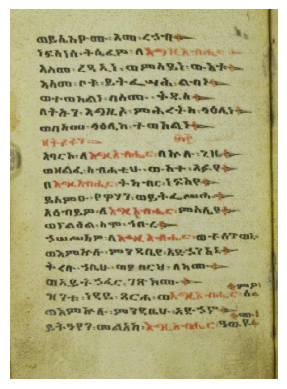

Ground-truth Texts             Prediction_Hopt_attn_CTC(CER=17.82)      Prediction_Transkribus(CER 65.25)
ወይሴስዮሙ፡እመ፡ረኃብ                       ወይሴከዮሙ፡እመ፡ረኃብ                              ኤእዮሙ፡ እመ፡
ነፍስነስ፡ትሴፈዎ፡ለእግዚያብሔር                 ነፍሳነስ፡ትሴፈም፡ለእ                              ነፍስነሰ፡ ትፈፈሥ፡ ለ
እስመ፡ረጻኢነ፡ወምስይነ፡ወእቱ                  እስመ፡ረዳኢነ፡ወምስይነ፡ውእተ                         ወእ እስመ፡ ረዓአ
እስመ፡ቦቱ፡ይትፌሣሕ፡ልብነ                    እስመ፡ቦቱ፡ይትፌሣሕ፡ልብነ                           እስመ፡ ቦት፡ ይትፈሣሕ፡ ልብ
ወተወስልነ፡በስሙ፡ቅዱስ                      ወተወከልነ፡በስሙ፡ቅዱስ                             ወተወአልነ፡ በስሙ፡ ቅዱስ
በትኩን፡እግዚኦ፡ምሕረትከ፡ባዕሊነ                ለትኩን፡እግዚኦ፡ምሕረትከ፡ባዕሌነ                       ለትሱን፡ እግዚኦ፡ ምሕረትከ፡ ባዕሌነ፡
ወበስመ፡ሳዕሊከ፡ተወከልነ                     ወበከመ፡ላዕሌከ፡ተወከልነ                            ወበከመ፡ ላዕሊከ፡ ትወአል
እባርኮ፡ለእግዚአብሔር፡በኩሉ፡ጊዜ                እባርከ፡ለእዚአብሔርበኩሉ፡ጊዜዚ                        ወ፡ ፡ ለኩሉ፡ ንዘ  ፡
ወዘልፈ፡ስብሐቲሁ፡ውስተ፡እፋየ                  ወዘልፈ፡ስብሐቲሁ፡ውስተ፡አፉየ                         ወዘልፈ፡ ሰብሐቲሁ፡ ውስተ፡ እፉየ፡
በእግዚያብሔር                     

In [111]:
image_path_page = '/content/drive/MyDrive/HHD_ethiopic/sample test/image_01051.png'

full_image= Image.open(image_path_page)

import matplotlib.pyplot as plt

plt.imshow(full_image)
plt.axis('off')  # Turn off axis labels
plt.show()
l,b=0,25
print(f'{"Ground-truth Texts":<30} {"Prediction_Hopt_attn_CTC(CER=17.82)":<40} {"Prediction_Transkribus(CER=65.25)"}')
for  i, j, z in zip(gt[l:b], text_list_pred[l:b], trankriby_text[l:b]):

  print(f'{("".join(i)):<35} {("".join(j)):<42} {("".join(z))}')